# PREDICTING EMPLOYEE ATTRITION RATE

This project make use of python based library to predict if a person would leave an organization or not.
The following approach will be following approach would be used in this project 
 1. Problem Definition 
 2. Data
 3. Evaluation
 4. Features
 5. Modelling
 6. Experimenting
 
 ### 1. Problem Definition 
 Deep dive into key data analytics concepts to predict the employees attrition rate in the organization, as well as which factors influence an employees to leave the organization. 
 
 #### Scope of Work 
 This project will help and cover the following:
 * Predicting individual employee attrition
 * Depicting important factors for an employee to leave the organization
 * Improving employee retention
 
 #### Goal/Metric
 Find the probability of an employee leaving the firm for the next 5 years and identify how to improve employee retention. 
 
  

### 2. Data 
 Data was gotten from Kaggle public dataset
 

In [1]:
#The following tools would be used for our data exploration
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
hr_data = pd.read_csv("HR_comma_sep.csv")
hr_data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [3]:
hr_data.tail(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
14989,0.43,0.57,2,159,3,1,1,0,technical,low
14990,0.89,0.88,5,228,5,1,1,0,support,low
14991,0.09,0.81,6,257,4,0,1,0,support,low
14992,0.40,0.48,2,155,3,0,1,0,support,low
14993,0.76,0.83,6,293,6,0,1,0,support,low
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


In [4]:
hr_data.shape #The data comprises of 14,999 rows and 10 columns

(14999, 10)

In [5]:
hr_data.duplicated().sum()

3008

In [6]:
hr_data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [7]:
hr_data.duplicated().sum()

3008

In [8]:
clean_hr_data = hr_data.drop_duplicates()

In [9]:
clean_hr_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


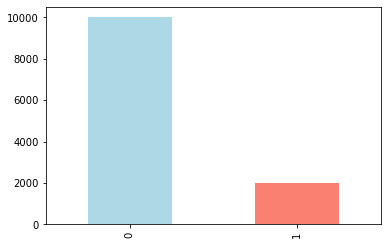

In [10]:
clean_hr_data["left"].value_counts().plot(kind="bar", color=["lightblue","salmon"]);

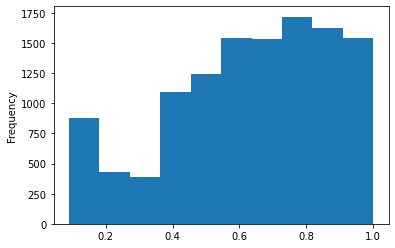

In [11]:
clean_hr_data["satisfaction_level"].plot.hist();

#### Hypothesis

In [12]:
corr = clean_hr_data.corr()
corr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.095186,-0.133246,-0.006252,-0.152915,0.039940,-0.350558,0.019789
last_evaluation,0.095186,1.000000,0.270256,0.264678,0.096829,-0.005695,0.013520,-0.007206
number_project,-0.133246,0.270256,1.000000,0.331516,0.188837,-0.005612,0.030928,-0.000544
average_montly_hours,-0.006252,0.264678,0.331516,1.000000,0.102875,-0.012860,0.070409,-0.004964
time_spend_company,-0.152915,0.096829,0.188837,0.102875,1.000000,0.000003,0.173295,0.056828
Work_accident,0.039940,-0.005695,-0.005612,-0.012860,0.000003,1.000000,-0.125436,0.029852
left,-0.350558,0.013520,0.030928,0.070409,0.173295,-0.125436,1.000000,-0.044657
promotion_last_5years,0.019789,-0.007206,-0.000544,-0.004964,0.056828,0.029852,-0.044657,1.000000


##### The following are the important factors that depict why employees are leaving the organiztion:
    * There is a positive correlation yet not strong between an employee leaving and last_evaluation
    * There is a positive correlation between *number_of_project* and employee leaving the organization
    * There is a positive correlation between *average monthly hours* and employee leaving.
    * There is a positive correlation between *time spend in the company* and employee leaving
    

#### Probing last evaluation


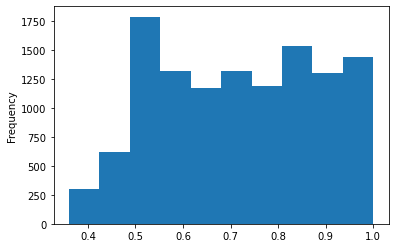

In [13]:
clean_hr_data.last_evaluation.plot.hist();

In [14]:
# salary_group = clean_hr_data.groupby(["salary", "sales"]).sum()
# sales_group = clean_hr_data.groupby(["sales"]).sum()

In [15]:
# # Number of project
# clean_hr_data.last_evaluation.plot.hist();

In [16]:
# # Average montly hours
# clean_hr_data.average_montly_hours.plot.hist();

In [17]:
# sales = clean_hr_data[clean_hr_data["sales"]=="sales"]
# account = clean_hr_data[clean_hr_data["sales"]=="accounting"] 
# hr = clean_hr_data[clean_hr_data["sales"]== "hr"]
# techn = clean_hr_data[clean_hr_data["sales"]== "technical"]
# support = clean_hr_data[clean_hr_data["sales"]=="support"]
# management = clean_hr_data[clean_hr_data["sales"]=="management"]
# it = clean_hr_data[clean_hr_data["sales"]=="IT"]
# pm = clean_hr_data[clean_hr_data["sales"]=="product_mng"]
# mkt = clean_hr_data[clean_hr_data["sales"]=="marketing"]
# r_d = clean_hr_data[clean_hr_data["sales"]=="RandD"]

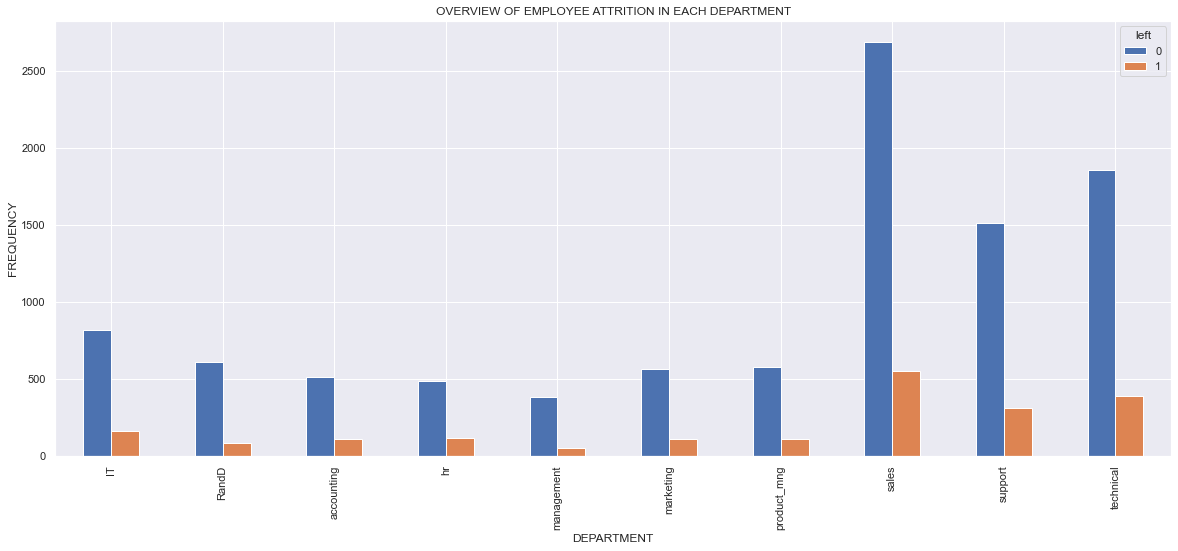

In [46]:
pd.crosstab(clean_hr_data["sales"], clean_hr_data["left"]).plot(kind="bar", 
                                                                title="OVERVIEW OF EMPLOYEE ATTRITION IN EACH DEPARTMENT",
                                                               xlabel="DEPARTMENT",
                                                               ylabel="FREQUENCY");


In [49]:
# sns.countplot(x="sales", hue="left", data=clean_hr_data).set(title="OVERVIEW OF EMPLOYEE ATTRITION IN EACH DEPARTMENT")
# sns.set(rc = {'figure.figsize':(20,8)})


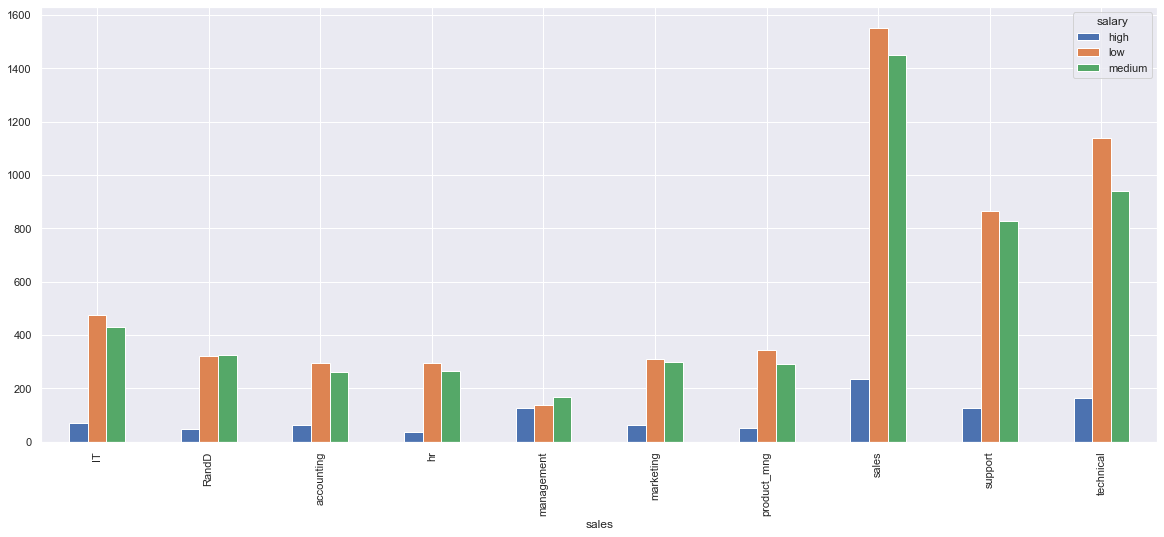

In [51]:
pd.crosstab(clean_hr_data["sales"], clean_hr_data["salary"]).plot(kind="bar");

In [72]:
# sns.countplot(x="sales", hue="salary", data=clean_hr_data).set(title="OVERVIEW OF EMPLOYEE SALARY IN VARIOUS DEPARTMENT ")
# sns.set(rc = {'figure.figsize':(20,8)})


The overview of the attrition rate and salary overview shows that more people with low salary in the sales, technicala and support tends to leave the organization more

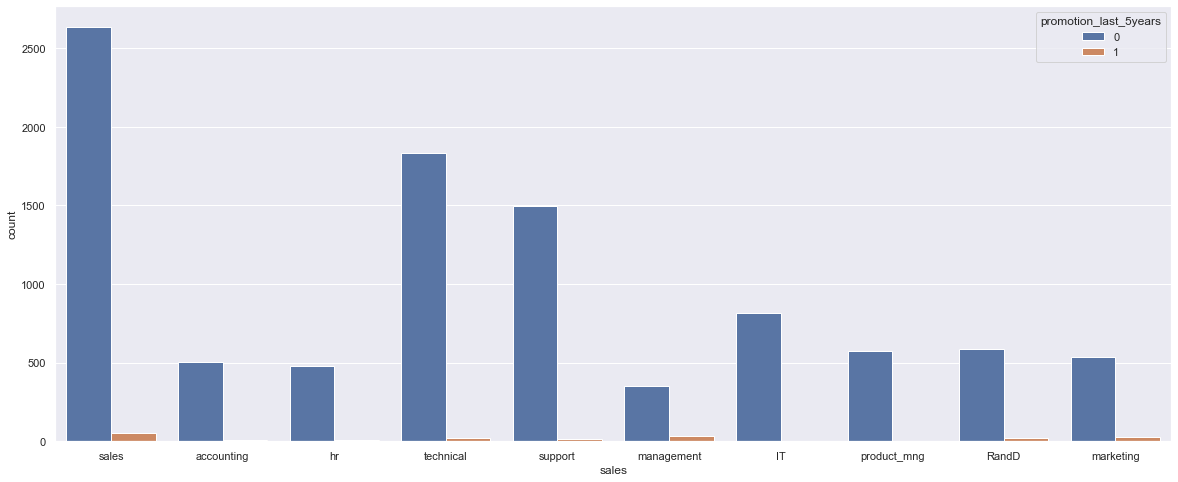

In [20]:
sns.countplot(x="sales", hue="promotion_last_5years", data=clean_hr_data[clean_hr_data["left"]==0]);

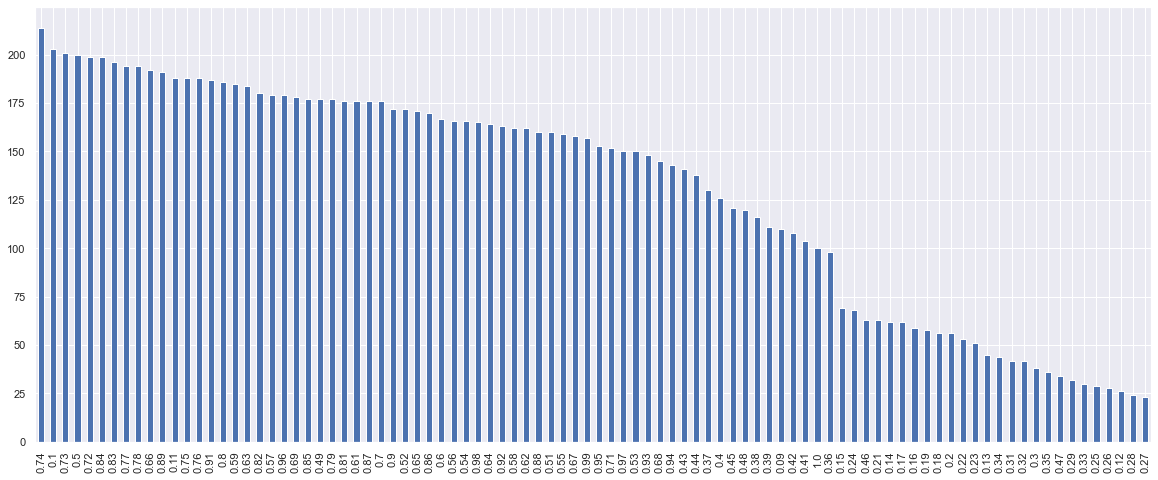

In [57]:
clean_hr_data["satisfaction_level"].value_counts().plot(kind="bar");

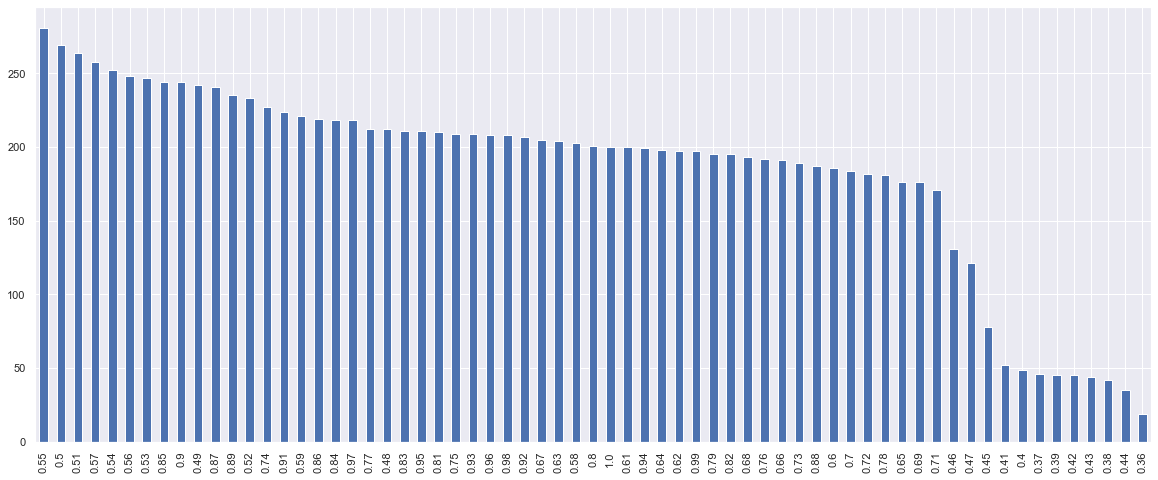

In [58]:
clean_hr_data["last_evaluation"].value_counts().plot(kind="bar");

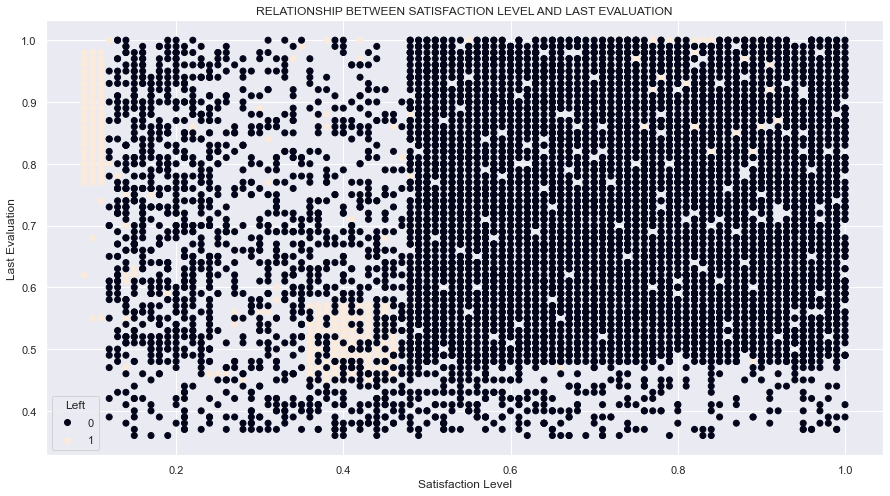

In [23]:
fig,ax = plt.subplots(figsize=(15,8))
scatter = ax.scatter(x=clean_hr_data["satisfaction_level"],
                    y=clean_hr_data["last_evaluation"],
                    c=clean_hr_data["left"])

ax.set(xlabel="Satisfaction Level",
      ylabel= "Last Evaluation",
      title= "RELATIONSHIP BETWEEN SATISFACTION LEVEL AND LAST EVALUATION")

ax.legend(*scatter.legend_elements(), title="Left");

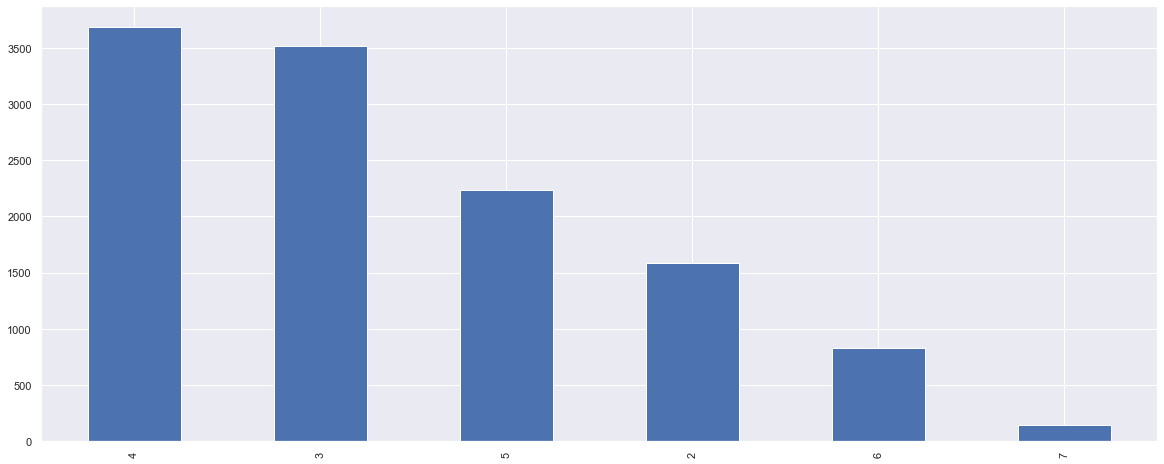

In [24]:
clean_hr_data["number_project"].value_counts().plot(kind="bar");

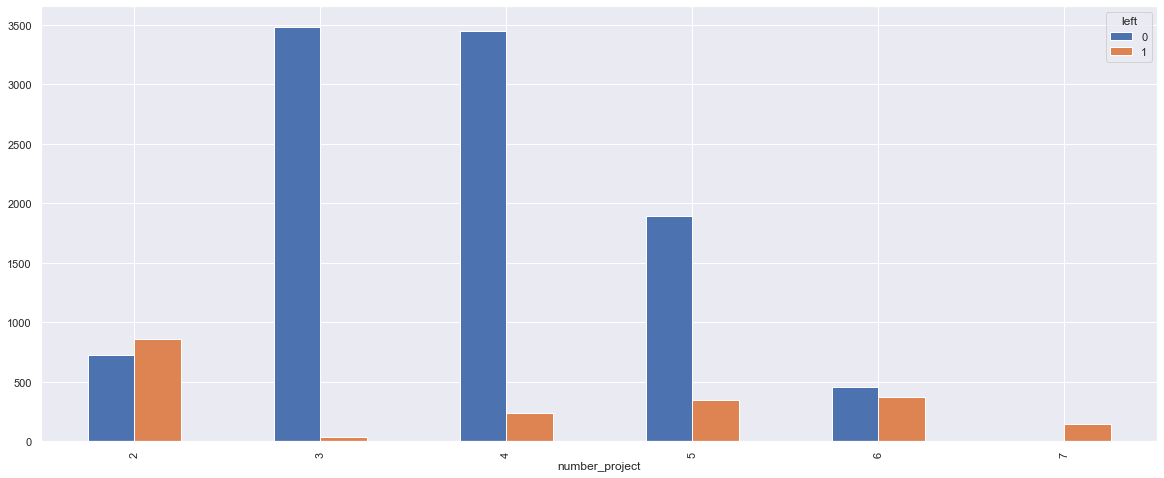

In [25]:
pd.crosstab(clean_hr_data["number_project"], clean_hr_data["left"]).plot(kind="bar");

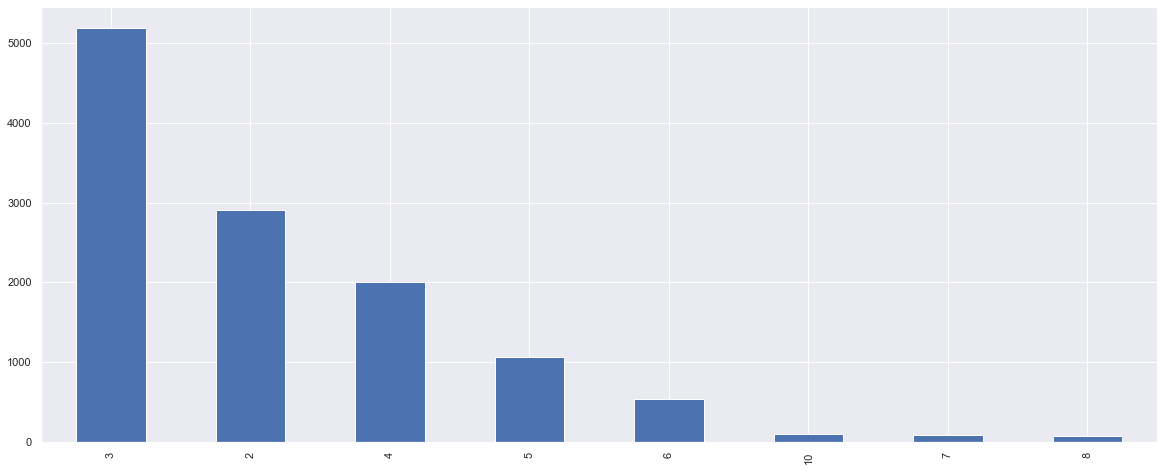

In [26]:
clean_hr_data["time_spend_company"].value_counts().plot(kind="bar");

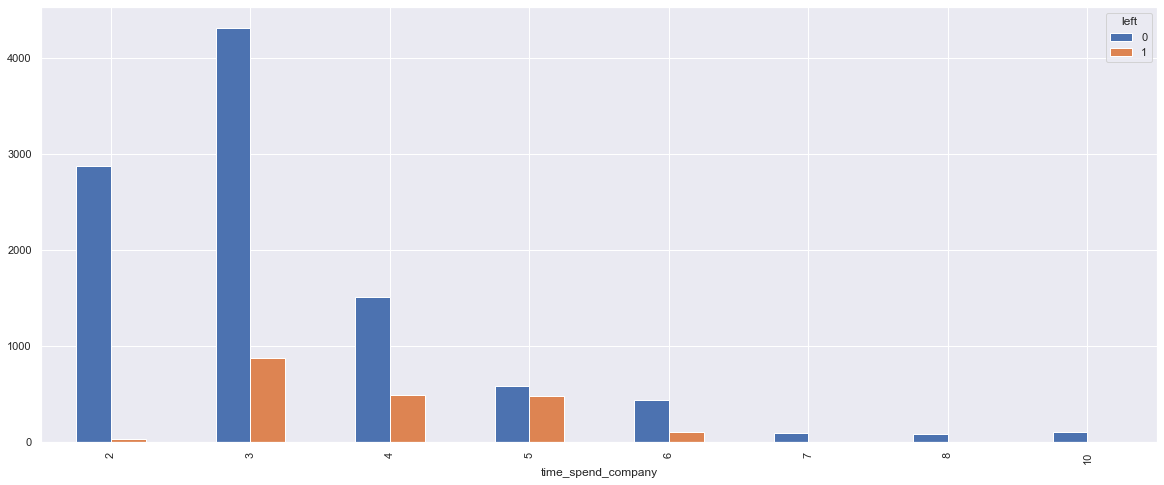

In [27]:
pd.crosstab(clean_hr_data["time_spend_company"], clean_hr_data["left"]).plot(kind="bar");

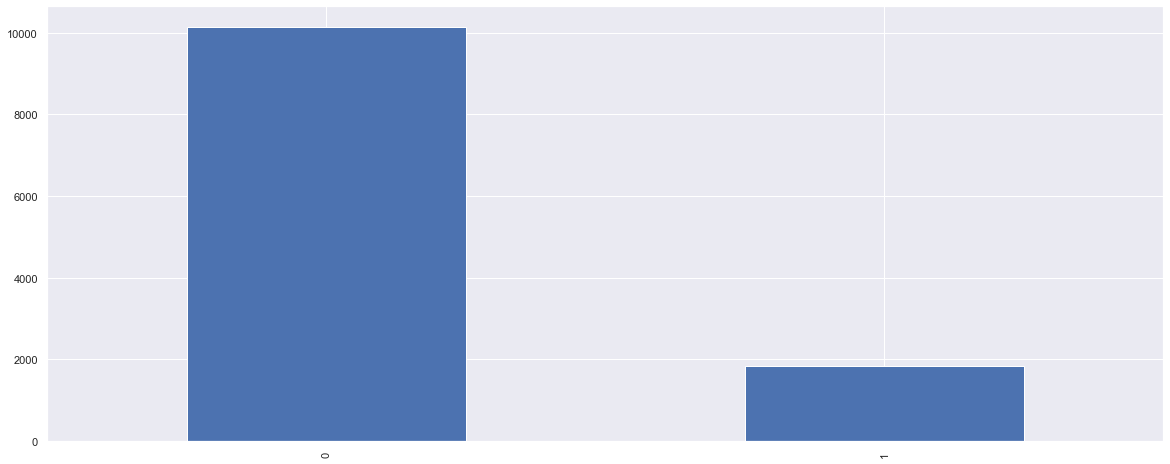

In [28]:
clean_hr_data["Work_accident"].value_counts().plot(kind="bar");

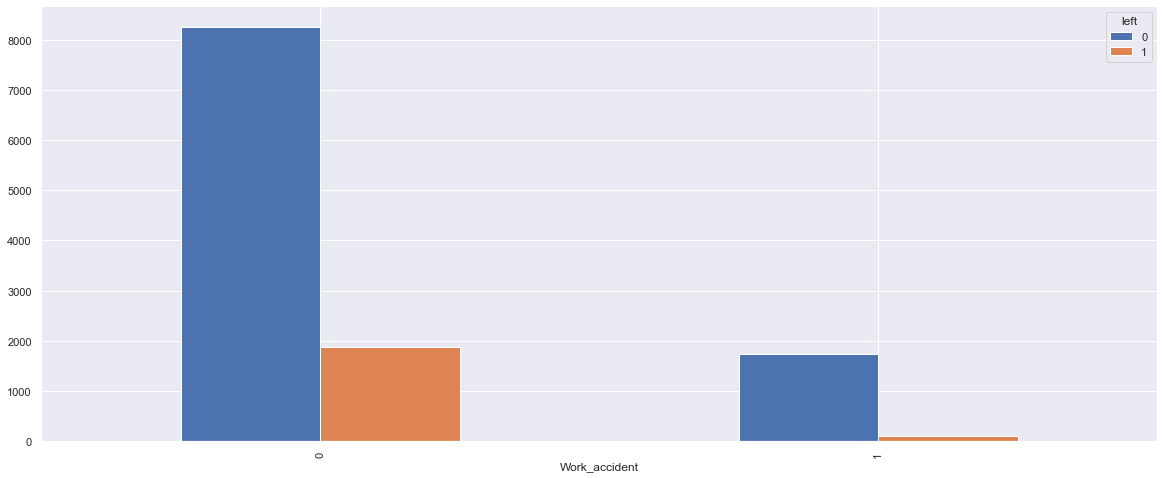

In [29]:
pd.crosstab(clean_hr_data["Work_accident"],clean_hr_data["left"]).plot(kind="bar");

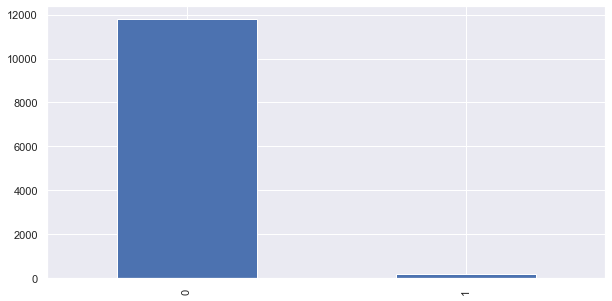

In [30]:
clean_hr_data["promotion_last_5years"].value_counts().plot(kind="bar", figsize=(10,5));

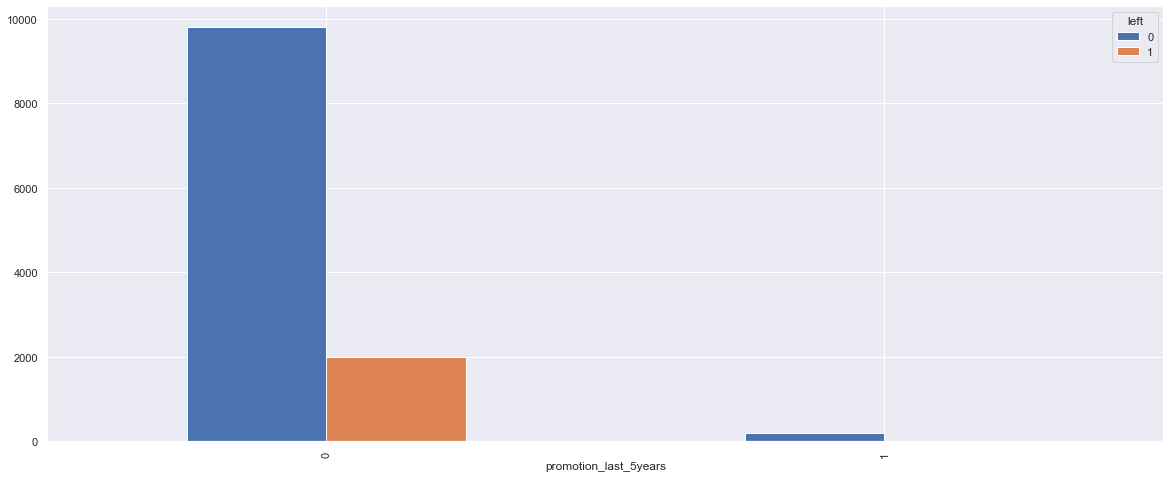

In [31]:
pd.crosstab(clean_hr_data["promotion_last_5years"], clean_hr_data["left"]).plot(kind="bar");

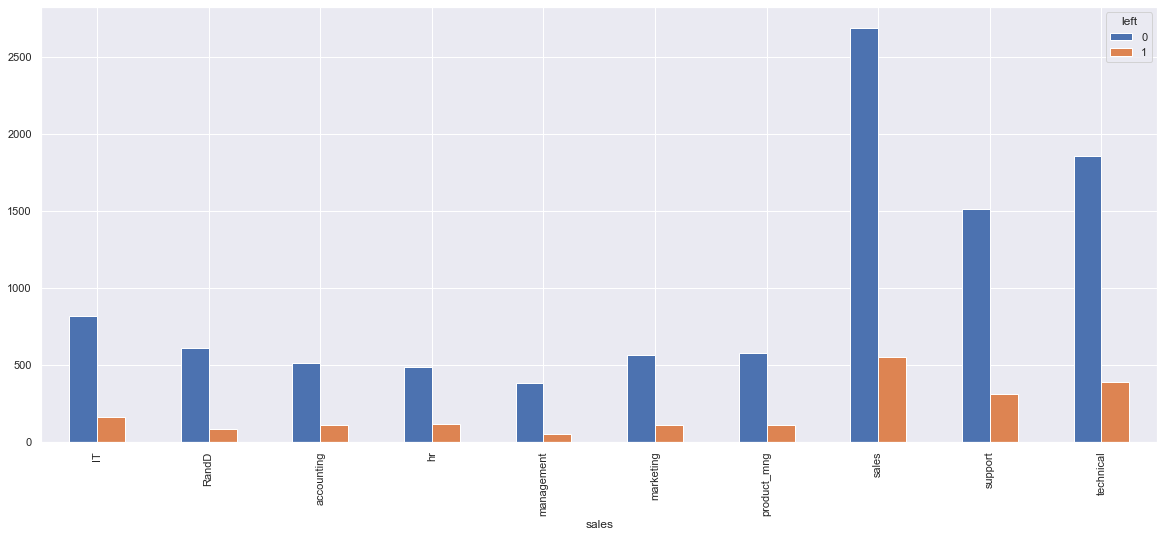

In [32]:
pd.crosstab(clean_hr_data["sales"],clean_hr_data["left"]).plot(kind="bar");

In [33]:
corr = clean_hr_data.corr()
corr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.095186,-0.133246,-0.006252,-0.152915,0.039940,-0.350558,0.019789
last_evaluation,0.095186,1.000000,0.270256,0.264678,0.096829,-0.005695,0.013520,-0.007206
number_project,-0.133246,0.270256,1.000000,0.331516,0.188837,-0.005612,0.030928,-0.000544
average_montly_hours,-0.006252,0.264678,0.331516,1.000000,0.102875,-0.012860,0.070409,-0.004964
time_spend_company,-0.152915,0.096829,0.188837,0.102875,1.000000,0.000003,0.173295,0.056828
Work_accident,0.039940,-0.005695,-0.005612,-0.012860,0.000003,1.000000,-0.125436,0.029852
left,-0.350558,0.013520,0.030928,0.070409,0.173295,-0.125436,1.000000,-0.044657
promotion_last_5years,0.019789,-0.007206,-0.000544,-0.004964,0.056828,0.029852,-0.044657,1.000000


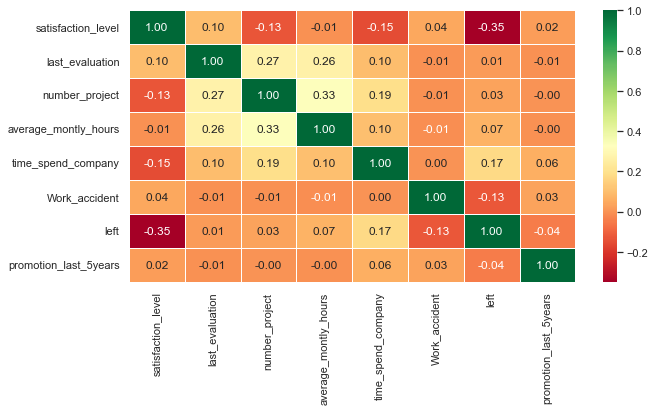

In [59]:
fig,ax = plt.subplots(figsize=(10,5))
sns.heatmap(corr,
           annot= True,
           linewidths = 0.5,
           fmt=".2f",
           cmap="RdYlGn");

In [83]:
clean_hr_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [87]:
sales_dict = clean_hr_data["sales"].value_counts()
print(sales_dict)

sales_dict_new = {
    "sales": 10,
    "technical": 9,
    "support": 8,
    "IT": 7,
    "RandD": 6,
    "product_mng": 5,
    "marketing": 4,
    "accounting": 3,
    "hr": 2,
    "management":1,
    "other": 0
}

print(sales_dict_new)

sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: sales, dtype: int64
{'sales': 10, 'technical': 9, 'support': 8, 'IT': 7, 'RandD': 6, 'product_mng': 5, 'marketing': 4, 'accounting': 3, 'hr': 2, 'management': 1, 'other': 0}


In [93]:
def dept(x):
    if str(x) in sales_dict_new.keys():
        return sales_dict_new[str(x)]
    else:
        return sales_dict_new["other"]
    
dept_data = clean_hr_data["sales"].apply(dept)
clean_hr_data["department"] = dept_data



/var/folders/y_/6crnyrp14hz7gvl8mlk3xr040000gn/T/ipykernel_4232/3827899725.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_hr_data["department"] = dept_data


In [115]:
clean_hr_data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary,department
0,0.38,0.53,2,157,3,0,1,0,sales,low,10
1,0.80,0.86,5,262,6,0,1,0,sales,medium,10
2,0.11,0.88,7,272,4,0,1,0,sales,medium,10
3,0.72,0.87,5,223,5,0,1,0,sales,low,10
4,0.37,0.52,2,159,3,0,1,0,sales,low,10
...,...,...,...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,10,1,0,1,management,high,1
11996,0.74,0.95,5,266,10,0,0,1,management,high,1
11997,0.85,0.54,3,185,10,0,0,1,management,high,1
11998,0.33,0.65,3,172,10,0,0,1,marketing,high,4


In [96]:
pay = pd.get_dummies(clean_hr_data["salary"])
pay.head()

,high,low,medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0


In [120]:
attrition = clean_hr_data["left"]

In [123]:
hr_dataset = pd.concat([clean_hr_data, pay, attrition], axis=1)
hr_dataset.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary,department,high,low,medium,left
0,0.38,0.53,2,157,3,0,1,0,sales,low,10,0,1,0,1
1,0.80,0.86,5,262,6,0,1,0,sales,medium,10,0,0,1,1
2,0.11,0.88,7,272,4,0,1,0,sales,medium,10,0,0,1,1
3,0.72,0.87,5,223,5,0,1,0,sales,low,10,0,1,0,1
4,0.37,0.52,2,159,3,0,1,0,sales,low,10,0,1,0,1


In [126]:
hr_dataset.drop(["sales", "salary"], axis=1)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,high,low,medium,left
0,0.38,0.53,2,157,3,0,1,0,10,0,1,0,1
1,0.80,0.86,5,262,6,0,1,0,10,0,0,1,1
2,0.11,0.88,7,272,4,0,1,0,10,0,0,1,1
3,0.72,0.87,5,223,5,0,1,0,10,0,1,0,1
4,0.37,0.52,2,159,3,0,1,0,10,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,10,1,0,1,1,1,0,0,0
11996,0.74,0.95,5,266,10,0,0,1,1,1,0,0,0
11997,0.85,0.54,3,185,10,0,0,1,1,1,0,0,0
11998,0.33,0.65,3,172,10,0,0,1,4,1,0,0,0


In [134]:
hr_dataset_2 = hr_dataset.drop(hr_dataset.columns[[6]], axis=1)
hr_dataset_2

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales,salary,department,high,low,medium
0,0.38,0.53,2,157,3,0,0,sales,low,10,0,1,0
1,0.80,0.86,5,262,6,0,0,sales,medium,10,0,0,1
2,0.11,0.88,7,272,4,0,0,sales,medium,10,0,0,1
3,0.72,0.87,5,223,5,0,0,sales,low,10,0,1,0
4,0.37,0.52,2,159,3,0,0,sales,low,10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,10,1,1,management,high,1,1,0,0
11996,0.74,0.95,5,266,10,0,1,management,high,1,1,0,0
11997,0.85,0.54,3,185,10,0,1,management,high,1,1,0,0
11998,0.33,0.65,3,172,10,0,1,marketing,high,4,1,0,0


In [139]:
attrition = clean_hr_data["left"]

hr_dataset_2["attrition"] = attrition

In [152]:
hr_nd = hr_dataset_2.drop(["sales","salary"], axis=1)

In [153]:
hr_corr_2 = hr_dataset_2.corr()

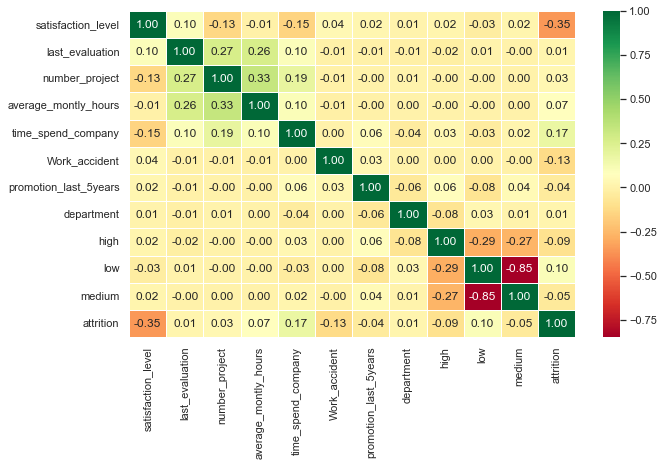

In [154]:
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.heatmap(hr_corr_2,
                annot=True,
                linewidths=0.5,
                fmt=".2f",
                cmap= "RdYlGn")

## DATA MODELLING 

In [188]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [161]:
## Splitting of Data to X and Y 

x = hr_nd.drop("attrition", axis=1)
y = hr_nd["attrition"]

## Splitting of data to train and test data

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [176]:
## Model Evaluation

models = {
    "Random Forest":RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(solver="lbfgs", max_iter=400),
    "Gaussian" : GaussianNB(),
    "Decision Tree" : DecisionTreeClassifier()
}

def train_and_test(models,x_train,x_test,y_train,y_test):
    ## set seed
    np.random.seed(42)
    model_score = {}
    for name, model in models.items():
        clf = model.fit(x_train,y_train)
        model_score[name] = clf.score(x_test, y_test)
    return model_score

In [177]:
model_scores = train_and_test(models=models,
              x_train = x_train,
              x_test=x_test,
              y_train=y_train,
              y_test=y_test)

In [178]:
model_scores

{'Random Forest': 0.9854105877448937,
 'KNN': 0.933305543976657,
 'Logistic Regression': 0.842434347644852,
 'Gaussian': 0.8186744476865361,
 'Decision Tree': 0.9691538140892039}

In [182]:
model_compare = pd.DataFrame(model_scores, index=["ACCURACY"])
model_compare

,Random Forest,KNN,Logistic Regression,Gaussian,Decision Tree
ACCURACY,0.985411,0.933306,0.842434,0.818674,0.969154


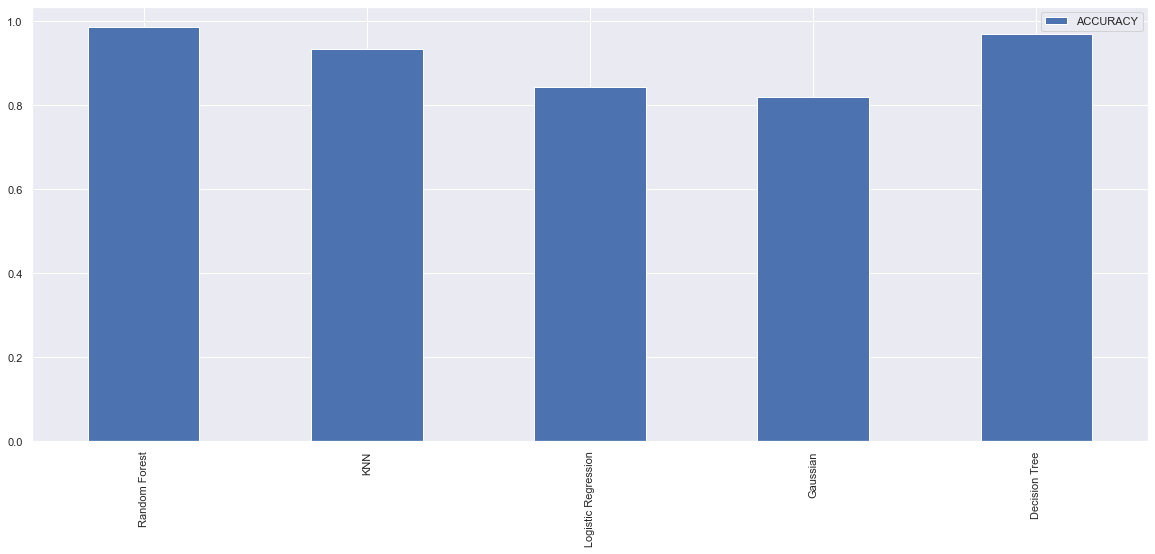

In [184]:
model_compare.T.plot(kind="bar");

In [186]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
rf.score(x_test,y_test)


0.9845769070446019

In [187]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt.score(x_test,y_test)

0.9695706544393498

In [193]:
## Best Performing Model Classification Report

rf_y_preds = rf.predict(x_test)
rf_report = classification_report(y_test, rf_y_preds)
print(rf_report)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2030
           1       0.99      0.91      0.95       369

    accuracy                           0.98      2399
   macro avg       0.99      0.95      0.97      2399
weighted avg       0.98      0.98      0.98      2399



In [194]:
dt_y_preds = dt.predict(x_test)
dt_report = classification_report(y_test, dt_y_preds)
print(dt_report)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2030
           1       0.89      0.91      0.90       369

    accuracy                           0.97      2399
   macro avg       0.94      0.95      0.94      2399
weighted avg       0.97      0.97      0.97      2399



## Feature Importance

In [206]:
feature_dict = dict(zip(hr_nd.columns, list(dt.feature_importances_)))
feature_dict

{'satisfaction_level': 0.4834044594230438,
 'last_evaluation': 0.15731308760914384,
 'number_project': 0.12954456623577915,
 'average_montly_hours': 0.088252428249665,
 'time_spend_company': 0.12083751253990191,
 'Work_accident': 0.0013470328815313455,
 'promotion_last_5years': 1.9116554666284597e-05,
 'department': 0.011437225798436852,
 'high': 0.0009258047037692222,
 'low': 0.003884837738679022,
 'medium': 0.0030339282653834595}

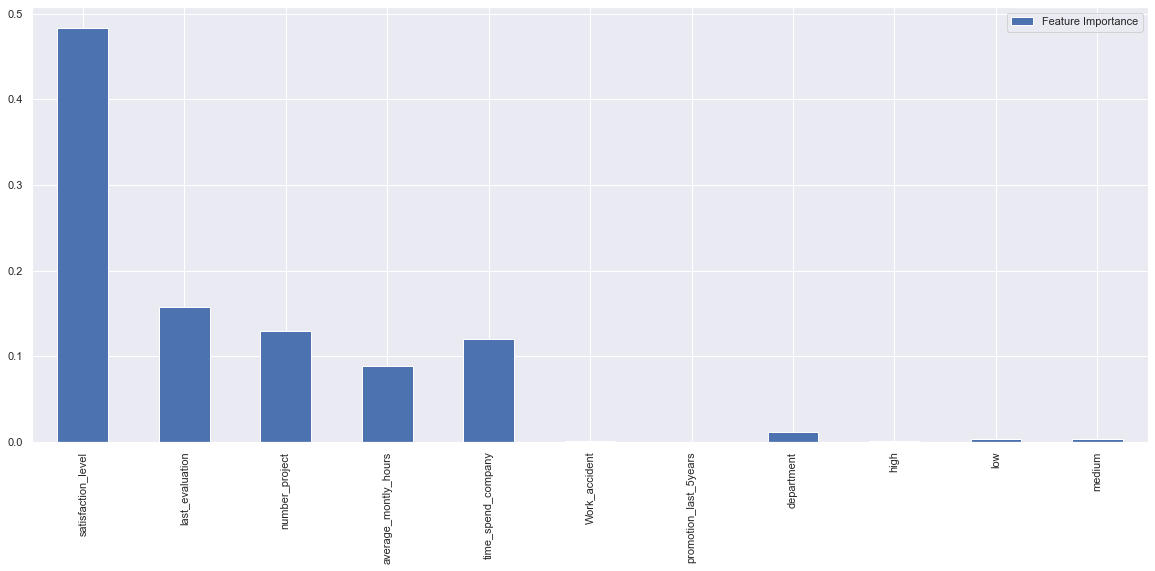

In [202]:
fd_viz = pd.DataFrame(feature_dict, index=["Feature Importance"])
fd_viz.T.plot(kind="bar");

In [217]:
## Saving Model 
import pickle

pickle.dump(dt, open("employee_attrition_rate.pkl", 'wb'))


In [220]:
load_eam.predict(x_test)

array([0, 1, 0, ..., 1, 0, 0])